# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Tali Motzkin 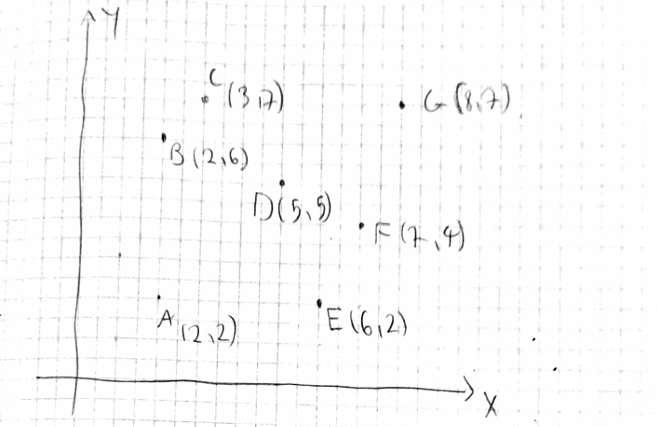206079253
2.   List item

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.decomposition import PCA

!pip install kneed
from kneed import KneeLocator

import seaborn as sns
sns.set(style="whitegrid")

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [ ]:
# load the data
customer_seg = pd.read_csv('customer_segmentation.csv')

In [ ]:
#Show the head of it to start invastigate
customer_seg.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


##The meaning of the columns:

Id: Unique identifier for each individual in the dataset.

Year_Birth: The birth year of the individual.

Education: The **highest** level of education attained by the individual.

Marital_Status: The marital status of the individual.

Income: The **annual** income of the individual.

Kidhome: The number of young children in the household.

Teenhome: The number of teenagers in the household.

Dt_Customer: The date when the customer was first **enrolled** or became a part of the company's database.

Recency: The number of days** since the last purchase** or interaction.

MntWines: The amount spent on wines.

MntFruits: The amount spent on fruits.

MntMeatProducts: The amount spent on meat products.

MntFishProducts: The amount spent on fish products.

MntSweetProducts: The amount spent on sweet products.

MntGoldProds: The amount spent on **gold** products.

NumDealsPurchases: The **number of purchases made with a discount** or as part of a deal.

NumWebPurchases: The number of purchases made through the company's **website**.

NumCatalogPurchases: The number of purchases made through **catalogs.**

NumStorePurchases: The number of purchases made in **physical** stores.

NumWebVisitsMonth: The number of visits to the company's **website in a month.**

AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.

AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.

AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.

AcceptedCmp1: Binary indicator (1 or 0) whether the individual **accepted** the **first** marketing campaign.

AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.

Complain: Binary indicator (1 or 0) whether the individual has made a **complaint**.

Z_CostContact: A constant cost associated with contacting a customer. **CAC**

Z_Revenue: A **constant revenue** associated with a successful campaign response.

Response: Binary indicator (1 or 0) whether the individual **responded** to the marketing campaign.

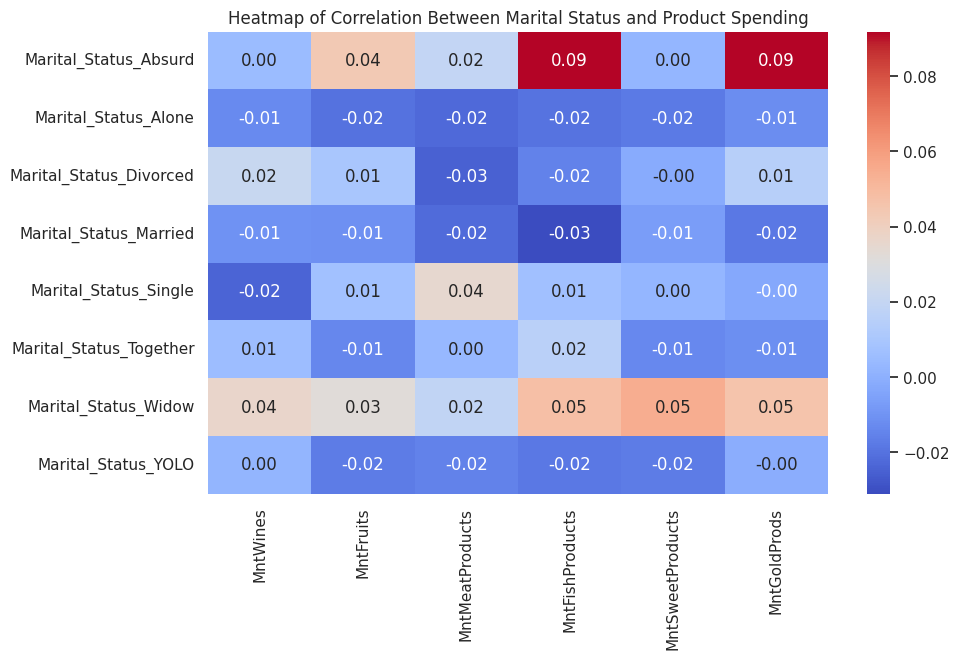

Let's see the amount of people in each segemnt





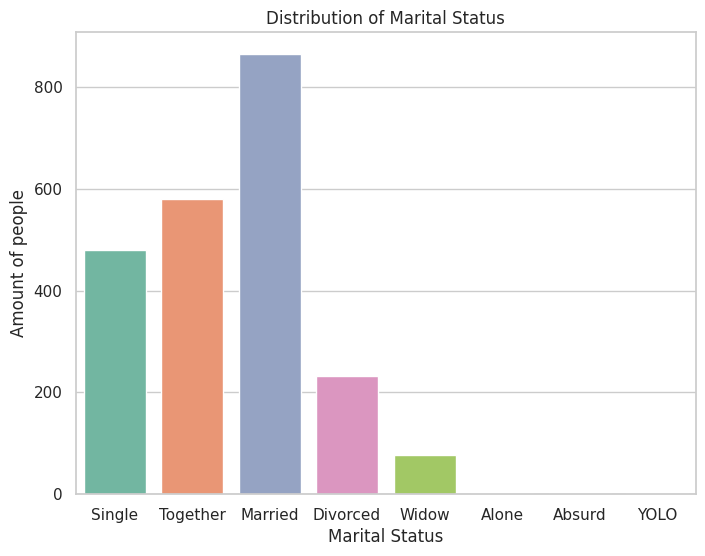

In [ ]:
# Graph 1 - we will see the correlation between martial status to different products and the amount that people buy them

# Since 'Marital_Status' is a categorical variable, we need to convert it to numerical values for correlation.
df_encoded = pd.get_dummies(customer_seg, columns=['Marital_Status'])

# Extracting the product spending columns
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Extracting the marital status columns
marital_columns = [col for col in df_encoded.columns if 'Marital_Status' in col]

# Creating a new DataFrame with only the product spending and marital status
correlation_data = df_encoded[product_columns + marital_columns]

# Calculating the correlation matrix for the new DataFrame
correlation_matrix = correlation_data.corr()

# We'll select only the correlations between marital status and products
correlation_matrix_filtered = correlation_matrix.loc[marital_columns, product_columns]

# Creating the heatmap with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of Correlation Between Marital Status and Product Spending')
plt.show()

# Create a bar plot for the distribution of marital status

print("Let's see the amount of people in each segemnt\n\n\n")
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=customer_seg, hue='Marital_Status', palette='Set2', legend=False)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Amount of people')
plt.show()

**Insight** - It seams that widows will spend more money: Fish, sweat and golds products.

Together status will probably spend more money in fish.

Single on sweats.

Married and Divorced spend less money fish. Divorced spend more in wine.

Alone status doesn't show a distinct pattern.

*NOTE* that all the correlations are not signnificant and correlation doesn't mean causation! However, the shop can try to make focus campign for example on married people (because they are the significant part of the costumers) and sell them less products that relate to fish while to single costumers (who are big part of the costumers as well) sell them sweat product and see with A-B tasting wether there will be an increase in sales in those martial status.

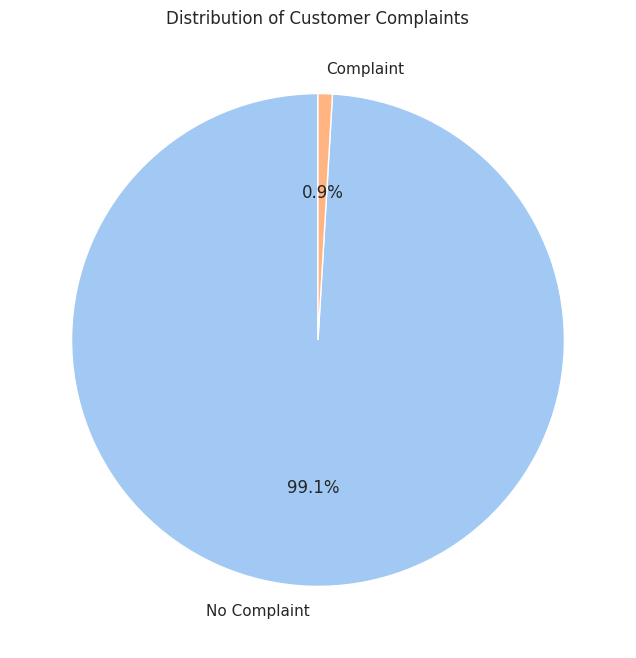

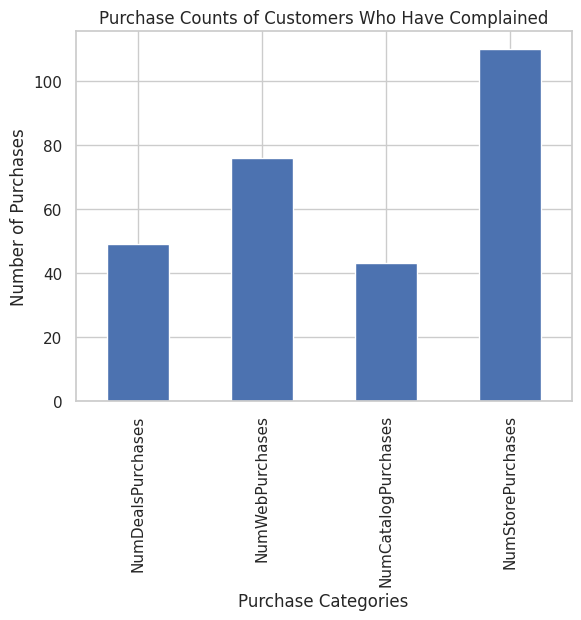




 Percentage of Deals to Complaining Customers: 26.344086021505376
Percentage of Deals to Non-Complaining Customers: 23.520561685055167 






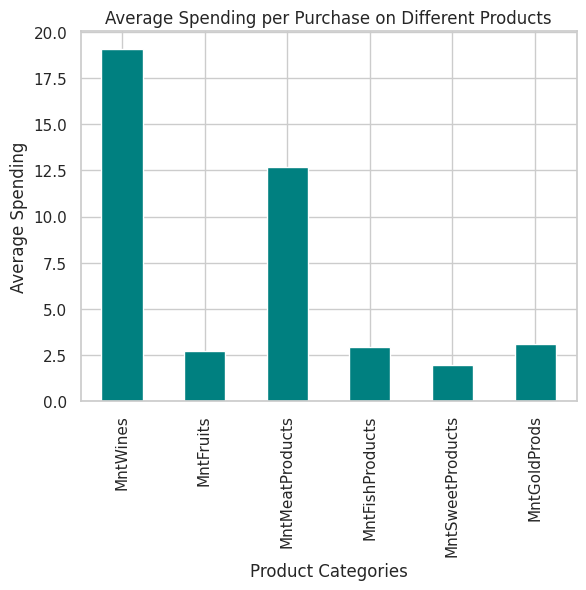

In [ ]:
# Graph 2 - Now we want to see  what is the percantage of costumers who complain, who they are, and what they usually spend their money on?

# Create a pie chart for the distribution of customer complaints
plt.figure(figsize=(8, 8))
complaint_counts = customer_seg['Complain'].value_counts()
plt.pie(complaint_counts, labels=['No Complaint', 'Complaint'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Customer Complaints')
plt.show()

#Filter the complainnig costumers
complaining_customers = customer_seg[customer_seg['Complain'] == 1]

#Count how many buys were at the shop and how many at the web and what is the amount of discounts and catalog buys
purchase_counts = complaining_customers[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

#plot this data
purchase_counts.plot(kind='bar')
plt.title('Purchase Counts of Customers Who Have Complained')
plt.ylabel('Number of Purchases')
plt.xlabel('Purchase Categories')
plt.show()

#number of non_complaining_customers
non_complaining_customers = customer_seg[customer_seg['Complain'] == 0]

#number of deals
total_deals_complaining = complaining_customers['NumDealsPurchases'].sum()
total_deals_non_complaining = non_complaining_customers['NumDealsPurchases'].sum()

#number of total porchases
total_customers_complaining = complaining_customers[['NumWebPurchases', 'NumStorePurchases']].sum().sum()
total_customers_non_complaining = non_complaining_customers[['NumWebPurchases', 'NumStorePurchases']].sum().sum()

#the percentage of complains
percent_deals_complaining = (total_deals_complaining / total_customers_complaining) * 100
percent_deals_non_complaining = (total_deals_non_complaining / total_customers_non_complaining) * 100

print("\n\n\n", "Percentage of Deals to Complaining Customers:", percent_deals_complaining)
print("Percentage of Deals to Non-Complaining Customers:", percent_deals_non_complaining, "\n\n\n\n")

# Sum the total spending in different categories
total_spending = complaining_customers[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Sum the total number of purchases (both physical and web)
total_purchases = complaining_customers[['NumWebPurchases', 'NumStorePurchases']].sum().sum()

# Calculate the average spending per purchase in each category
average_spending_per_purchase = total_spending / total_purchases

# Create a bar plot for the average spending
average_spending_per_purchase.plot(kind='bar', color='teal')
plt.title('Average Spending per Purchase on Different Products')
plt.ylabel('Average Spending')
plt.xlabel('Product Categories')
plt.show()


**Insight** - We generally see that most of the costumers are not complainning which is good,but let's see how can we improve it!

1. We see that most of the costumers who are complainning buying products in the physical shop so maybe there are problems there.

2. They are on average spending money mostly on wine products. Maybe there are problems with this product!

3. They are getting 26% discounts or deasls from their porchases compared to 23% of non-complaining costumers. So maybe the store can give them more deals and decrease the deals given to the non-complaining people.

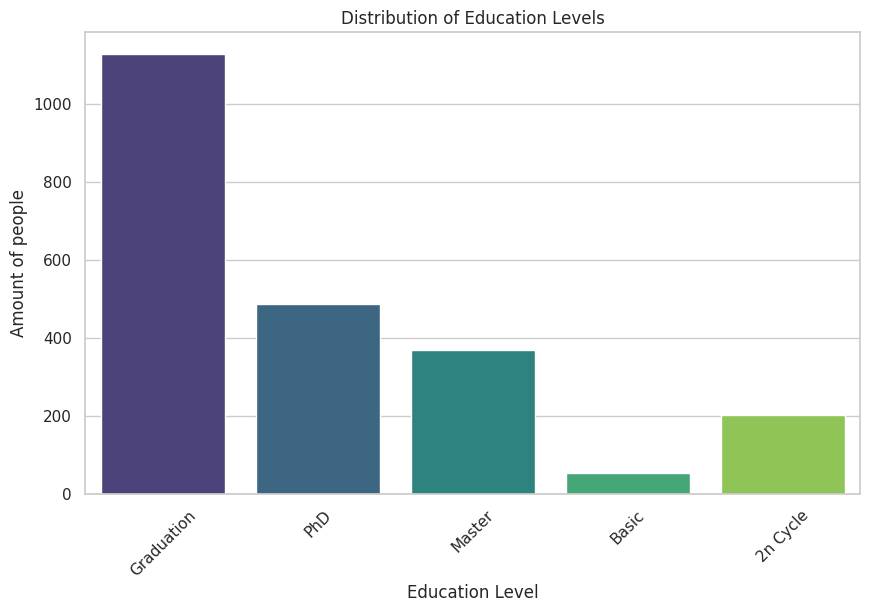

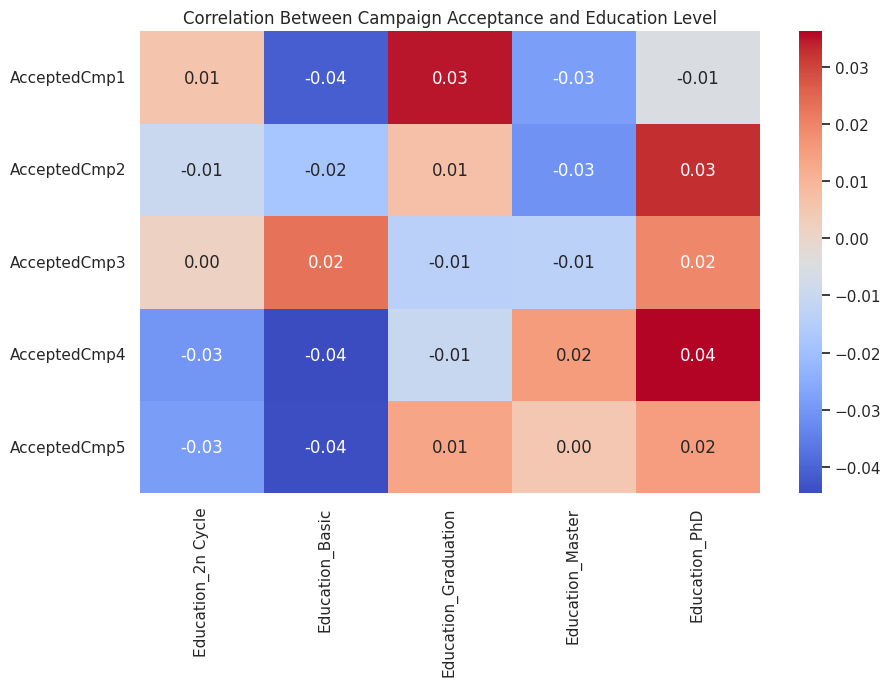

In [ ]:
# Graph 3 - Let's see if the different campign work on different costumers via their education levels
# Create a bar plot for the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Education',  hue='Education', data=customer_seg, palette='viridis', legend=False)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Amount of people')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#Convert the 'Education' column into dummy variables
df_encoded = pd.get_dummies(customer_seg, columns=['Education'])

#Select Campaign and Education Columns:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
education_columns = [col for col in df_encoded.columns if 'Education' in col]

#Calculate the Correlation Matrix:
correlation_data = df_encoded[campaign_columns + education_columns]
correlation_matrix = correlation_data.corr()

#Filter and Visualize the Correlation Matrix:
correlation_matrix_filtered = correlation_matrix.loc[campaign_columns, education_columns]

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Between Campaign Acceptance and Education Level')
plt.show()

**Insight** - We want to focus on the graduation level costumers because they are the majority of are costumers.
We see that campign 1 mostly worked on them so let's focus on this campign.
The PHd segment is the second most important costumer segment and the 4th campign maunly worked on them so let's try keep doing this campign on the future.  

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [ ]:
# load the data
customer_seg = pd.read_csv('customer_segmentation.csv')

In [ ]:
# Scale the data using MinMaxScaler

#make a copy of the data
for_scaling = customer_seg

#use the minmax scale
minmax_scale = MinMaxScaler()

#find the fisrt date of the costumers joining to the shop
for_scaling['Dt_Customer'] = pd.to_datetime(for_scaling['Dt_Customer'])

# Find today's date
today = datetime.now()

#calculate the number of days till today and replace it with the date column
for_scaling['Days_Since_Joined'] = (today - for_scaling['Dt_Customer']).dt.days

#for date of birth let's calculate the age so it will be more insightfull
current_year = datetime.now().year
for_scaling['Age'] = current_year - for_scaling['Year_Birth']

# Encode categorical variables
for_scaling['Education'] = for_scaling['Education'].map({'Graduation':0, "PhD":1, "Master":2, "2n Cycle":3, "Basic":4})
for_scaling['Marital_Status'] = for_scaling['Marital_Status'].map({'Single':0, "Together":1, "Married":2, "Divorced":3, "Absurd":4, "Alone":5, "Widow":6, "YOLO":7})


#Set the numerical columns we want to scale
#NOTE! we didn't include ID - because it not valueable and we didn't include the Z_CostContac and Z_Revenue because they are constant through all data!
columns_to_scale = ['Days_Since_Joined','Age', 'Income','Education', 'Marital_Status', 'Kidhome','Teenhome', 'MntMeatProducts', 'MntWines','Recency', 'MntFruits', 'MntFishProducts', 'MntSweetProducts',
                                                           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                                                           'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp2', "AcceptedCmp1", 'AcceptedCmp4','AcceptedCmp5',
                                                           'Complain', 'Response']
#make an array of scaled columns
costumer_minmax = minmax_scale.fit_transform(for_scaling[columns_to_scale])

# Convert the array back to a DataFrame
customer_minmax_df = pd.DataFrame(costumer_minmax, columns=columns_to_scale)

#provide the id back
customer_minmax_df['ID'] = for_scaling['ID']
customer_minmax_df = customer_minmax_df.set_index('ID')



<ipython-input-8-4afb361ad5c0>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  for_scaling['Dt_Customer'] = pd.to_datetime(for_scaling['Dt_Customer'])


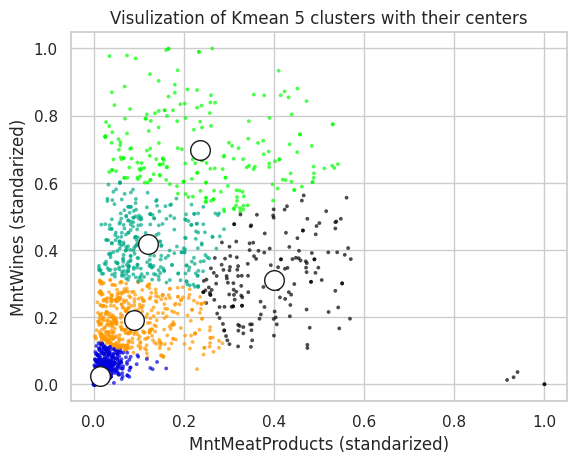

In [ ]:

# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5

#set number of clusters
n_clusters=5

#run Kmeans
clusterer = KMeans(n_clusters=n_clusters,n_init=10, random_state=10)
cluster_labels = clusterer.fit_predict(customer_minmax_df[['MntMeatProducts', 'MntWines']])

# Visualize the clusters

#set 5 colors to each instense
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

#plot the data
plt.scatter(customer_minmax_df['MntMeatProducts'], customer_minmax_df['MntWines'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

# find the centers
centers = clusterer.cluster_centers_

# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

#set axis lables
plt.title("Visulization of Kmean 5 clusters with their centers")
plt.xlabel('MntMeatProducts (standarized)')
plt.ylabel('MntWines (standarized)')
plt.show()

### Elbow

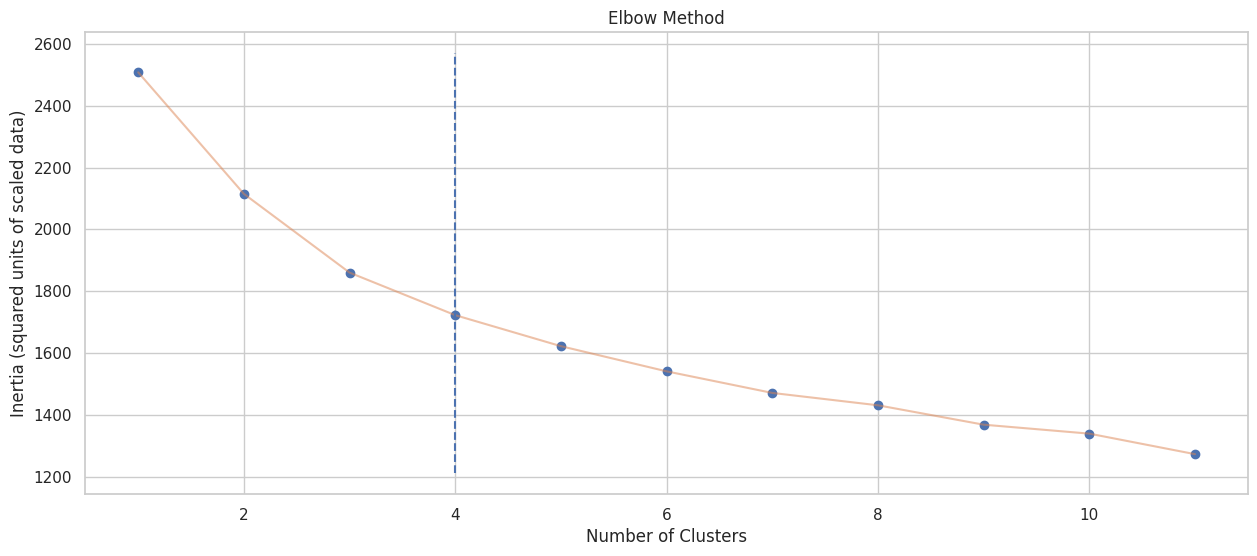

In [ ]:
#find the NULLS and erase the rows with them
customer_cleaned = customer_minmax_df.dropna()

#prepare the data for Kmeans
all_data = customer_cleaned[columns_to_scale].iloc[: , :].values
#prepare the inertia y column for telling the means of sum in clusters
inertia = []
#perform 12 k_means to see on which the lowest inertia satarts to balance
for k in range(1 , 12):
    algorithm = (KMeans(n_clusters = k ,max_iter=300, n_init= 10,
                          random_state= 10 ) )
    algorithm.fit(all_data)
    inertia.append(algorithm.inertia_)

#plot the inertia with the numbers of clusters
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 12) , inertia , 'o')
plt.plot(np.arange(1 , 12) , inertia , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia (squared units of scaled data)')

##calculate the best k with the library kneed and plot it
x = range(1, 12)
kn = KneeLocator(x, inertia, curve='convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()


The best K-means Cluster will be 4 by the elbow method

### Silhouette Score

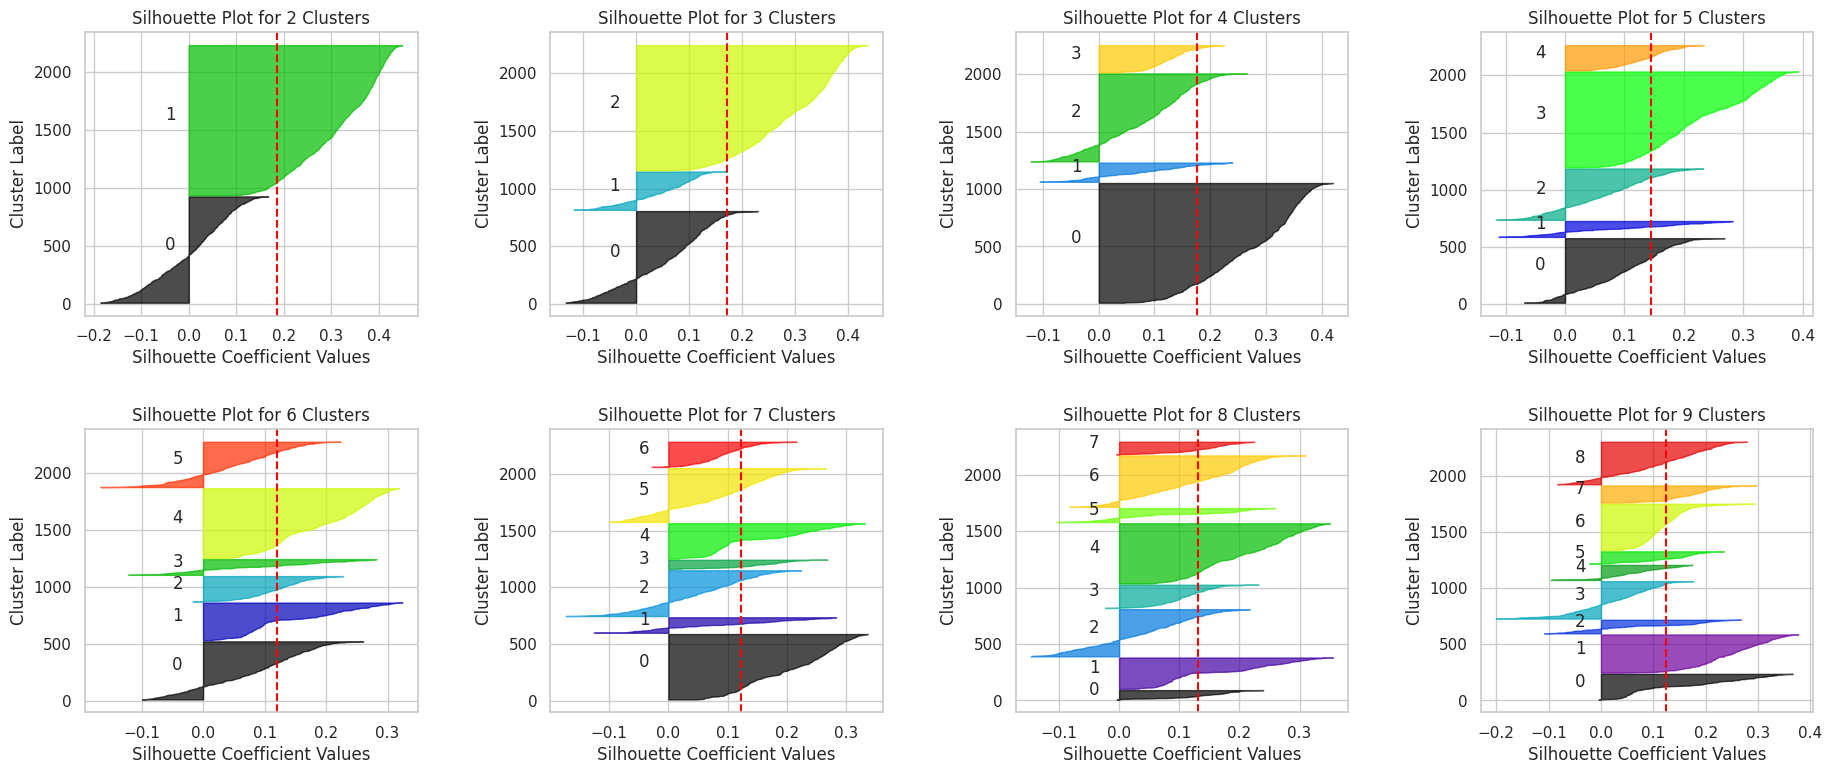

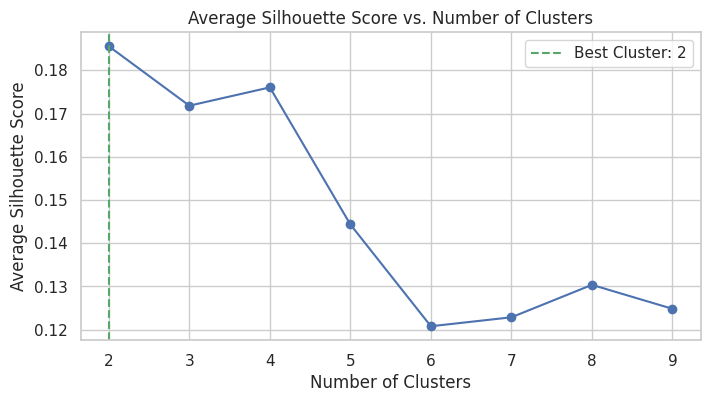

The best Cluster is 2 with the average score of: 0.1855674776253366


In [ ]:
#Load the data
X = customer_cleaned[columns_to_scale]
cluster_range = range(2, 10)

# Create a subplot grid for silhouette plots
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9, wspace=0.4, hspace=0.4)

silhouette_scores = []  # To store average silhouette scores

best_cluster = None
best_silhouette_score = -1

for i, n_clusters in enumerate(cluster_range):
    ax = axs[i // 4, i % 4]

    # Create and fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters,n_init = 10 ,random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Compute the silhouette score for this clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label='Mean Silhouette Score')
    ax.set_title(f'Silhouette Plot for {n_clusters} Clusters')
    ax.set_xlabel('Silhouette Coefficient Values')
    ax.set_ylabel('Cluster Label')

    # Check if the current cluster is the best one
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_cluster = n_clusters

# Create a separate figure for the average silhouette score
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.axvline(x=best_cluster, color='g', linestyle='--', label=f'Best Cluster: {best_cluster}')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score vs. Number of Clusters')
plt.legend()

# Show the plots
plt.show()

print(f'The best Cluster is {best_cluster} with the average score of: {best_silhouette_score}')

###The best K by silhouette method will be 2

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





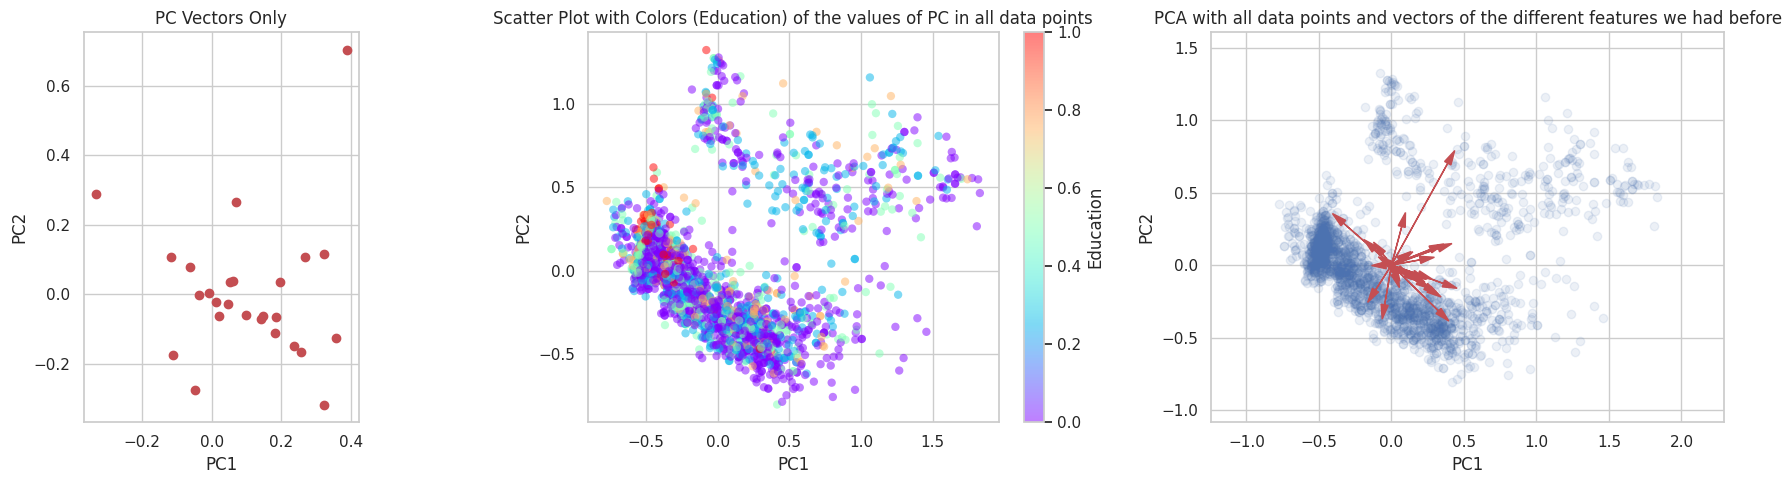

explained varince in components, first component: 0.24789752103562776, second:0.1433243117084681
explained varince Ratio!! in components, first component: 0.21890715073412068, second:0.12656325313765665

 we see that we are not getting into 80% acceptence, then let's make another PCA with 10 components 

the components variance ratio: [0.21890715 0.12656325 0.08134438 0.07713262 0.06890453 0.06543573
 0.05424457 0.04009098 0.03842693 0.03369388]


10 components can exaplain 80% percent of the variance in the data!, their sum: 80.47440176470658%


In [ ]:
#We wil use the same cleaned data as before!

# Adjust n_components as needed
X = customer_cleaned[columns_to_scale]
pca = PCA(n_components=2)
pca.fit(X)
customer_seg_pca = pca.transform(X)

# Create a DataFrame with the principal components
customer_seg_pca_df = pd.DataFrame(customer_seg_pca, columns=['PC1', 'PC2'])
customer_seg_pca_df['ID'] = customer_cleaned.index
customer_seg_pca_df = customer_seg_pca_df.set_index('ID')

customer_combined_df = pd.concat([customer_cleaned, customer_seg_pca_df], axis=1)

# Plotting the PCA
# Create a 1x3 grid of subplots with a wider layout
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the width (e.g., figsize=(18, 5))

# Plot 1: PC Vectors Only
axs[0].scatter(pca.components_[0, :], pca.components_[1, :], color='r')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('PC Vectors Only')
axs[0].set_aspect('equal')

# Plot 2: Scatter plot with colors
scatter = axs[1].scatter(
    customer_combined_df['PC1'],
    customer_combined_df['PC2'],
    c=customer_combined_df["Education"],
    edgecolor='none',
    alpha=0.5,
    cmap=plt.colormaps['rainbow']
)
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('Scatter Plot with Colors (Education) of the values of PC in all data points')
plt.colorbar(scatter, ax=axs[1], label='Education')

# Plot 3: PCA Loadings Plot
axs[2].scatter(customer_seg_pca_df['PC1'], customer_seg_pca_df['PC2'], alpha=0.1)

# Plot the vectors for each original feature
for i in range(pca.components_.shape[1]):  # Iterate over the number of original features
    axs[2].arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', head_width=0.05, head_length=0.1)

axs[2].set_xlabel('PC1')
axs[2].set_ylabel('PC2')
axs[2].set_title('PCA with all data points and vectors of the different features we had before')
axs[2].axis('equal')

# Adjust the layout and show the subplots
plt.tight_layout()
plt.show()

# Display explained variance
print(f'explained varince in components, first component: {pca.explained_variance_[0]}, second:{pca.explained_variance_[1]}')
print(f'explained varince Ratio!! in components, first component: {pca.explained_variance_ratio_[0]}, second:{pca.explained_variance_ratio_[1]}')

print("\n","we see that we are not getting into 80% acceptence, then let's make another PCA with 10 components", "\n")

pca2 = PCA(n_components=10)
pca2.fit(X)
customer_seg_pca = pca2.transform(X)
print(f'the components variance ratio: {pca2.explained_variance_ratio_}')
print("\n")
print(f'10 components can exaplain 80% percent of the variance in the data!, their sum: {pca2.explained_variance_ratio_.sum()*100}%')


**Q**: What is the variance explained in the 2 component PCA?

**A**: in two components:
explained varince in components, first component: 0.24, second:0.14

explained varince Ratio!! in components, first component: 0.21, second:0.12

Therefore, we found out that only 10 components will reach 80% explanation, with the ratio of each:
[0.21, 0.12, 0.08, 0.07, 0.06, 0.06,
 0.05, 0.04, 0.03, 0.03]


## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





### Elbow

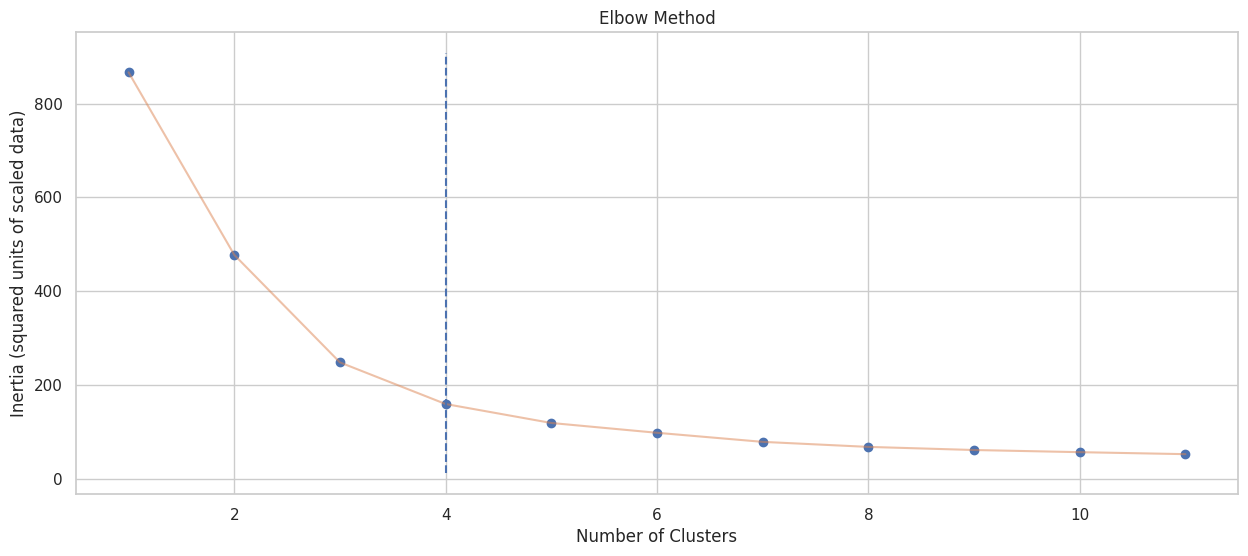

In [ ]:
#prepare the data for Kmeans (we used the same data as before with 2 components!)
all_data = customer_seg_pca_df.iloc[: , :].values
#prepare the inertia y column for telling the means of sum in clusters
inertia = []
#perform 12 k_means to see on which the lowest inertia satarts to balance
for k in range(1 , 12):
    algorithm = (KMeans(n_clusters = k ,max_iter=300,n_init=10,
                          random_state= 10 ) )
    algorithm.fit(all_data)
    inertia.append(algorithm.inertia_)

#plot the inertia with the numbers of clusters
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 12) , inertia , 'o')
plt.plot(np.arange(1 , 12) , inertia , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia (squared units of scaled data)')


##calculate the best k with the library kneed and plot it
x = range(1, 12)
kn = KneeLocator(x, inertia, curve='convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()


An elbow of 4 clusters

### Silhouette

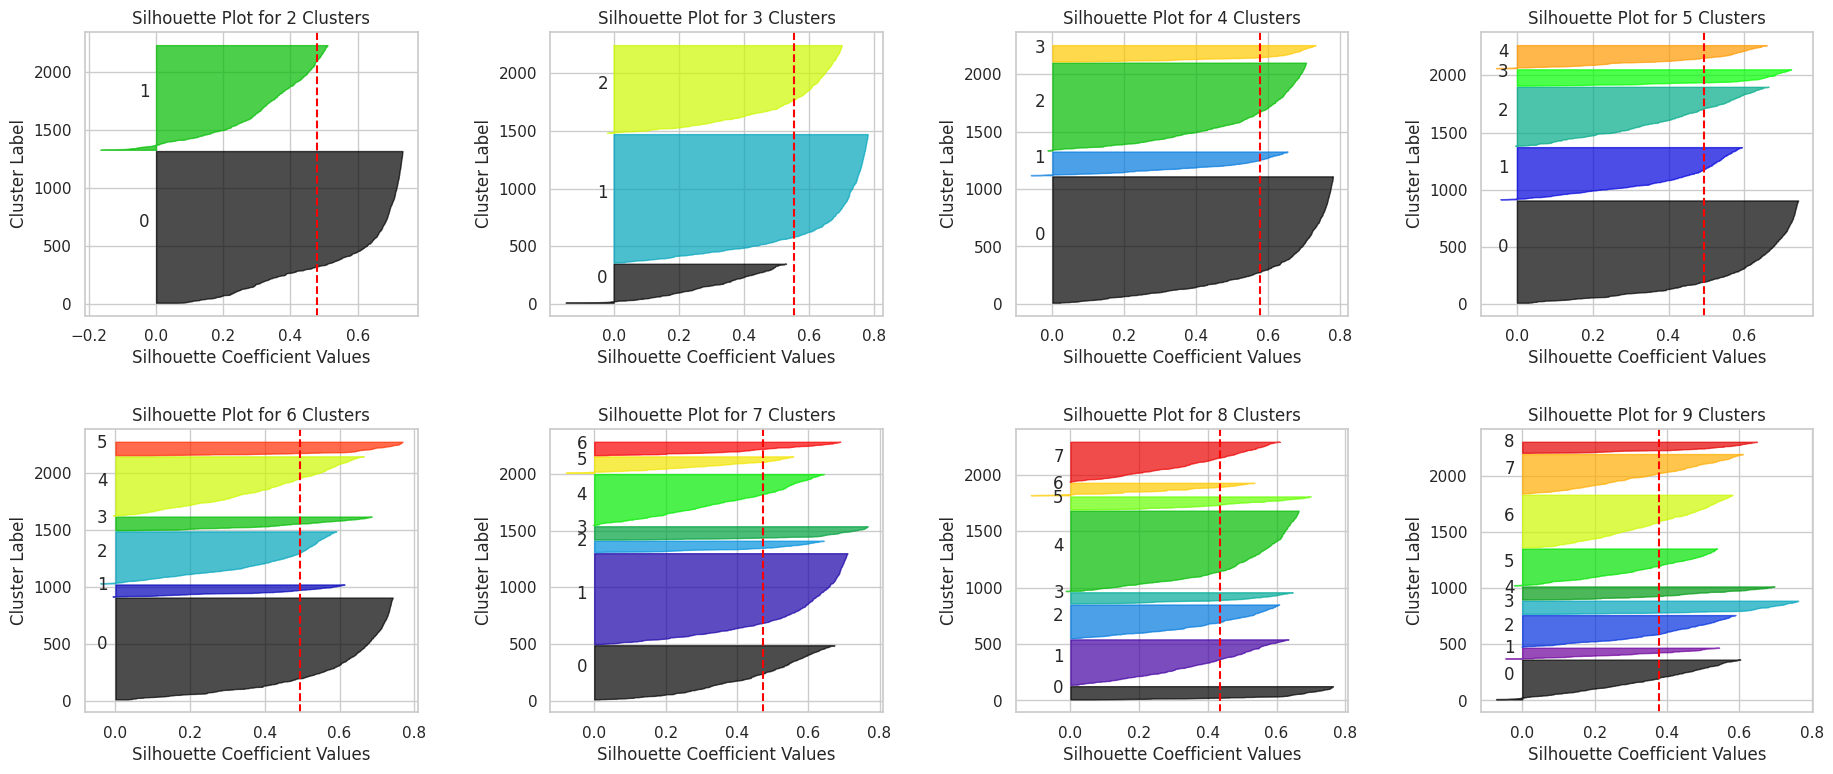

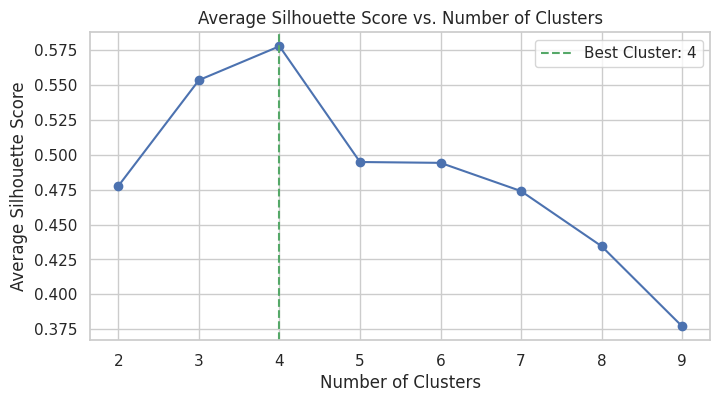

The best Cluster is 4 with the average score of: 0.5776322443926107


In [ ]:
#Load the data
X = customer_seg_pca_df
cluster_range = range(2, 10)

# Create a subplot grid for silhouette plots
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9, wspace=0.4, hspace=0.4)

silhouette_scores = []  # To store average silhouette scores

best_cluster = None
best_silhouette_score = -1

for i, n_clusters in enumerate(cluster_range):
    ax = axs[i // 4, i % 4]

    # Create and fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters,n_init = 10 ,random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Compute the silhouette score for this clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label='Mean Silhouette Score')
    ax.set_title(f'Silhouette Plot for {n_clusters} Clusters')
    ax.set_xlabel('Silhouette Coefficient Values')
    ax.set_ylabel('Cluster Label')

    # Check if the current cluster is the best one
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_cluster = n_clusters

# Create a separate figure for the average silhouette score
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.axvline(x=best_cluster, color='g', linestyle='--', label=f'Best Cluster: {best_cluster}')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score vs. Number of Clusters')
plt.legend()

# Show the plots
plt.show()

print(f'The best Cluster is {best_cluster} with the average score of: {best_silhouette_score}')

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:
Both of the methods return 4 with acceptable score of 0.575 to silhouette method and a good elbow of 4 as well. It seems to our eye that both of the methods return what they should. However, if we will run this methods on the 10 components as PCA suggested to get 80% explainable variance - maybe we will get even more significant results.

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).












[click here to see the visualization](https://drive.google.com/file/d/1JmCOfRImRDRXxiWDJ7t04ta_QP_gFT78/view?usp=drive_link)

[click here to see the answers to the questions](https://drive.google.com/file/d/1QwwiIE29Jy_IgYmFQzoifZn8pikQwKE2/view?usp=drive_link)

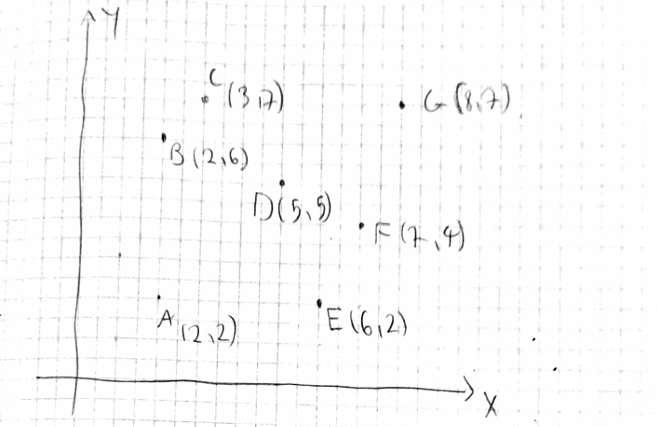




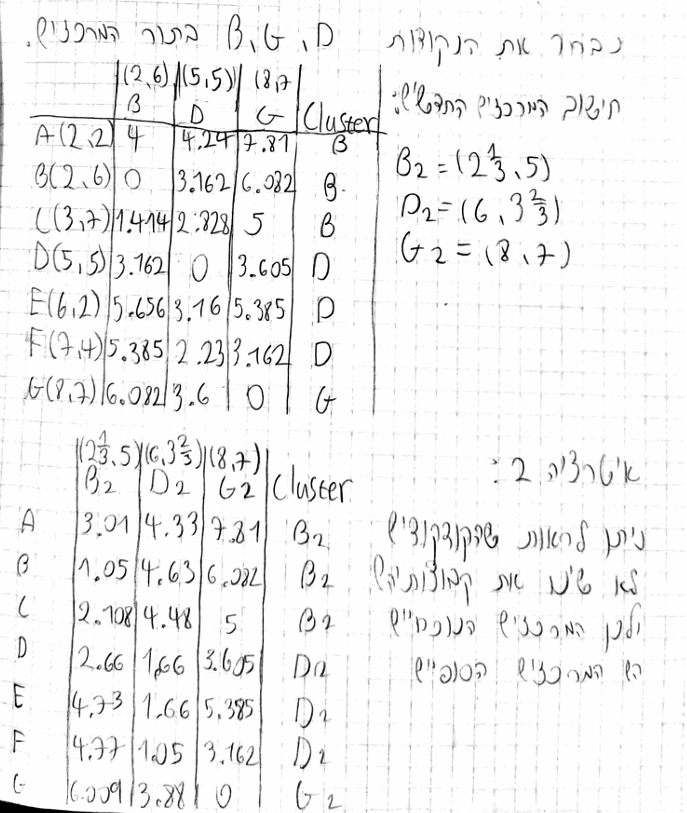

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






##Answers:

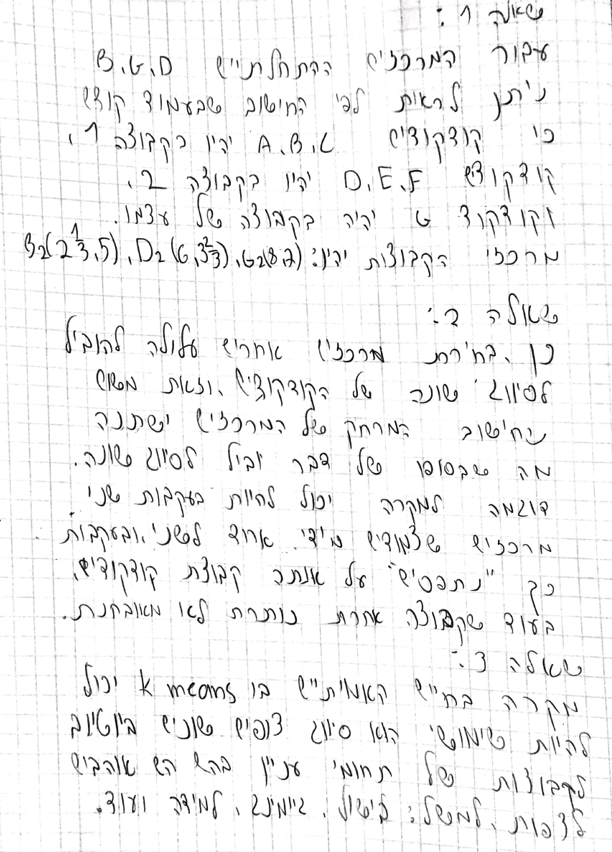

**Answers**:



## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

The PCA projection matrix means that this is the matrix that spans space. Threfore, each of the vectors there is it's eigenvector! the first vector (1,2) spans the space with greater value (because it's corresponding eigienvalue is 5).

So, in order to get the projection to one dimention of the desired vectors, we need to project each one of them on the space with the eigenvector that have the higher eigenvalue which is (1,2)

a simple matrix calculation will give as the value of **7** to the vector **(1,3)** and **17** to vector **(3,7)**.